In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_lables = []
train_samples = []

In [3]:
for i in range(50):
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_lables.append(1)
    
    
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_lables.append(0)
    
for i in range(1000):
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_lables.append(0)
    
    
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_lables.append(1)
    

In [4]:
for i in train_samples:
    print(i)

40
80
56
81
42
91
31
100
47
80
19
74
47
78
42
87
43
70
28
69
27
87
62
73
41
80
35
90
51
82
40
78
19
99
49
85
25
70
35
69
31
70
48
93
53
99
38
97
56
70
58
89
56
78
16
65
26
96
33
99
49
73
22
97
34
68
48
77
48
69
53
72
48
69
39
79
31
65
51
98
15
71
19
80
55
90
36
67
57
67
43
86
22
98
35
82
22
95
40
89
22
71
58
75
38
69
42
90
17
82
64
73
36
82
45
71
52
90
45
100
44
90
55
91
18
89
21
97
16
100
45
90
24
82
42
92
43
92
45
67
49
87
32
96
38
69
62
94
42
74
47
82
29
89
17
94
16
68
21
71
30
68
64
96
18
69
20
65
51
80
36
100
48
74
23
85
17
78
50
83
35
76
37
89
26
94
58
77
47
99
37
82
15
80
30
89
49
84
25
90
33
86
20
88
39
96
19
90
29
98
22
87
25
99
25
81
59
91
20
76
27
89
20
87
52
82
21
70
36
73
34
82
20
85
51
90
24
66
15
86
20
95
22
80
45
93
45
89
18
65
33
84
51
82
20
74
51
84
44
73
48
75
29
86
56
100
18
87
23
93
31
90
57
71
32
92
35
93
40
98
53
97
39
79
15
83
51
68
16
66
53
69
59
78
56
80
52
76
21
73
44
76
13
85
32
79
60
68
36
76
54
85
29
66
16
77
22
93
27
82
50
71
37
70
24
68
49
90
25
68
55
67

In [5]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)
train_lables, train_samples = shuffle(train_lables, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_trained_samples = scaler.fit_transform(train_samples.reshape(-1,1))


In [7]:
for i in scaled_trained_samples:
    print(i)

[0.8045977]
[0.18390805]
[0.40229885]
[0.48275862]
[0.17241379]
[0.20689655]
[0.72413793]
[0.17241379]
[0.52873563]
[0.18390805]
[0.87356322]
[0.67816092]
[0.71264368]
[1.]
[0.54022989]
[0.]
[0.6091954]
[0.63218391]
[0.90804598]
[0.98850575]
[0.06896552]
[0.94252874]
[0.04597701]
[0.72413793]
[0.37931034]
[0.89655172]
[0.77011494]
[0.7816092]
[0.87356322]
[0.37931034]
[0.12643678]
[0.49425287]
[0.70114943]
[0.77011494]
[0.43678161]
[0.06896552]
[0.59770115]
[0.82758621]
[0.77011494]
[0.96551724]
[1.]
[0.87356322]
[0.40229885]
[0.71264368]
[0.51724138]
[0.62068966]
[0.75862069]
[0.55172414]
[0.87356322]
[0.70114943]
[0.54022989]
[0.04597701]
[0.45977011]
[0.25287356]
[0.42528736]
[0.3908046]
[0.59770115]
[0.28735632]
[0.29885057]
[0.02298851]
[0.75862069]
[0.54022989]
[1.]
[0.88505747]
[0.67816092]
[0.36781609]
[0.33333333]
[0.43678161]
[0.97701149]
[0.1954023]
[0.90804598]
[0.29885057]
[0.11494253]
[0.27586207]
[0.4137931]
[0.81609195]
[0.68965517]
[0.73563218]
[0.26436782]
[0.55172414

# # time for making neural network for this

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("gpu" ,len(physical_devices))


gpu 0


In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(x=scaled_trained_samples,y=train_lables, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 4s - loss: 0.6635 - accuracy: 0.5471 - 4s/epoch - 17ms/step
Epoch 2/30
210/210 - 1s - loss: 0.6242 - accuracy: 0.6367 - 737ms/epoch - 4ms/step
Epoch 3/30
210/210 - 1s - loss: 0.5926 - accuracy: 0.6967 - 766ms/epoch - 4ms/step
Epoch 4/30
210/210 - 1s - loss: 0.5643 - accuracy: 0.7243 - 814ms/epoch - 4ms/step
Epoch 5/30
210/210 - 1s - loss: 0.5369 - accuracy: 0.7652 - 836ms/epoch - 4ms/step
Epoch 6/30
210/210 - 1s - loss: 0.5097 - accuracy: 0.7957 - 748ms/epoch - 4ms/step
Epoch 7/30
210/210 - 1s - loss: 0.4831 - accuracy: 0.8157 - 775ms/epoch - 4ms/step
Epoch 8/30
210/210 - 1s - loss: 0.4570 - accuracy: 0.8371 - 827ms/epoch - 4ms/step
Epoch 9/30
210/210 - 1s - loss: 0.4326 - accuracy: 0.8529 - 697ms/epoch - 3ms/step
Epoch 10/30
210/210 - 1s - loss: 0.4099 - accuracy: 0.8724 - 709ms/epoch - 3ms/step
Epoch 11/30
210/210 - 1s - loss: 0.3893 - accuracy: 0.8771 - 721ms/epoch - 3ms/step
Epoch 12/30
210/210 - 1s - loss: 0.3710 - accuracy: 0.8824 - 695ms/epoch - 3ms/step
Epo

In [14]:
model.fit(x=scaled_trained_samples,y=train_lables,validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.2571 - accuracy: 0.9349 - val_loss: 0.3127 - val_accuracy: 0.9238 - 2s/epoch - 8ms/step
Epoch 2/30
189/189 - 1s - loss: 0.2559 - accuracy: 0.9392 - val_loss: 0.3128 - val_accuracy: 0.9238 - 806ms/epoch - 4ms/step
Epoch 3/30
189/189 - 1s - loss: 0.2549 - accuracy: 0.9349 - val_loss: 0.3119 - val_accuracy: 0.9238 - 787ms/epoch - 4ms/step
Epoch 4/30
189/189 - 1s - loss: 0.2541 - accuracy: 0.9360 - val_loss: 0.3106 - val_accuracy: 0.9238 - 792ms/epoch - 4ms/step
Epoch 5/30
189/189 - 1s - loss: 0.2532 - accuracy: 0.9407 - val_loss: 0.3107 - val_accuracy: 0.9238 - 823ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.2526 - accuracy: 0.9386 - val_loss: 0.3103 - val_accuracy: 0.9238 - 797ms/epoch - 4ms/step
Epoch 7/30
189/189 - 1s - loss: 0.2518 - accuracy: 0.9354 - val_loss: 0.3098 - val_accuracy: 0.9238 - 857ms/epoch - 5ms/step
Epoch 8/30
189/189 - 1s - loss: 0.2511 - accuracy: 0.9370 - val_loss: 0.3081 - val_accuracy: 0.9333 - 857ms/epoch - 5ms/step
Epo

In [15]:
test_lables = []
test_samples = []

In [16]:
for i in range(50):
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(1)
    
    
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(0)
    
for i in range(1000):
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(0)
    
    
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(1)
    

In [17]:
test_lables = np.array(test_lables)
test_samples = np.array(test_samples)
test_lables, test_samples = shuffle(test_lables, test_samples)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))


# Pridict


In [19]:
predictions = model.predict(x=scaled_test_samples,batch_size=10, verbose=0)

In [21]:
for i in predictions:
    print(i)

[0.04641071 0.9535893 ]
[0.9654439 0.0345561]
[0.31984264 0.68015736]
[0.9678287  0.03217132]
[0.9648215  0.03517843]
[0.02370318 0.97629684]
[0.8040001 0.1959999]
[0.96326745 0.03673257]
[0.02653885 0.97346115]
[0.9665754  0.03342465]
[0.18595856 0.8140415 ]
[0.9606314  0.03936865]
[0.96868134 0.0313187 ]
[0.96513414 0.03486593]
[0.06446624 0.9355338 ]
[0.40287536 0.5971246 ]
[0.06446624 0.9355338 ]
[0.9696307  0.03036924]
[0.03716476 0.96283525]
[0.96868134 0.0313187 ]
[0.9219068  0.07809319]
[0.96965563 0.03034437]
[0.00952384 0.99047613]
[0.07181972 0.9281802 ]
[0.05781871 0.9421812 ]
[0.05181873 0.9481813 ]
[0.9406529  0.05934706]
[0.96513414 0.03486593]
[0.96962243 0.03037754]
[0.28191274 0.71808726]
[0.9688956  0.03110444]
[0.665854   0.33414608]
[0.01889142 0.9811086 ]
[0.07994036 0.9200597 ]
[0.00952384 0.99047613]
[0.6245704 0.3754296]
[0.00762047 0.99237955]
[0.96499276 0.03500719]
[0.8941147 0.1058853]
[0.9681153  0.03188465]
[0.9696307  0.03036924]
[0.5369318  0.46306822]


In [22]:
rounded_predictions= np.argmax(predictions,axis=-1)

In [23]:
for i in rounded_predictions:
    print(i)

1
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
1
1
1
0
0
0
1
0
0
1
1
1
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
0
0
1
1
0
0
0
0
1
1
1
0
1
0
1
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
1
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
1
1
1
1
0
1
0
1
0
0
0
1
1
0
0
1
0
0
1
1
1
0
0
0
0
1
0
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
0
0
1
1
0
0
1
0
0
0
0
1
1
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
1
1
0
0
0
1
0
0
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
1
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
1
0
1
0
0
1
1
0
1
1
0
1
1
0
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0


# Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_lables, y_pred=rounded_predictions)

In [26]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 982   68]
 [  49 1001]]


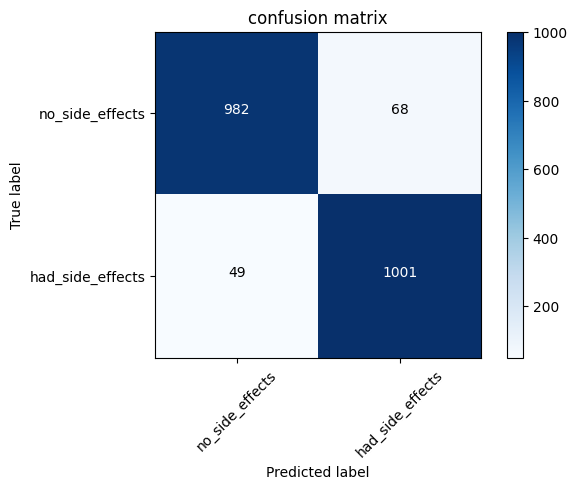

In [27]:
cm_plot_lables = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_lables, title='confusion matrix')

# model saving


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# this is when u want to save model as
    
## 1.  this uses model.save

    1. architucture of model, it also allows to recreate  the model
    2. the weight of the model is also save
    3. the training config like (loss,optimizer
    4. the state of optimizer, allows to resume training exactly where u leftof

In [30]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [31]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [32]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [33]:
new_model.get_weights()

[array([[ 0.37001482,  0.5251896 , -0.51320386, -0.23094785, -0.15940449,
          0.5063816 ,  0.62543696, -0.3737393 , -0.19540158, -0.15915334,
          0.59018576, -0.45252752,  0.7812527 , -0.37237912, -0.26681992,
         -0.59316903]], dtype=float32),
 array([-0.14954223,  0.19467063,  0.        ,  0.        ,  0.        ,
        -0.17450446, -0.17909992,  0.        ,  0.        ,  0.        ,
        -0.18246344,  0.        , -0.14657997,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 0.12990525,  0.5866829 ,  0.26998127, -0.34634942, -0.34212932,
          0.28908178, -0.1789609 ,  0.18322036, -0.5200971 ,  0.1779634 ,
          0.06490784, -0.26357412, -0.19579251, -0.30741146, -0.0155495 ,
         -0.26324657,  0.05448525, -0.05031317, -0.09867202,  0.21104336,
         -0.27982566, -0.25183567, -0.25008532,  0.5025515 , -0.4164168 ,
          0.18842134,  0.4686334 , -0.27829108, -0.23900755, -0.3136495 ,
         -0.24370524,  0.429064  ],
 

In [35]:
new_model.optimizer

#  2. to_json

    this is used when u want to save architucture but not weights or its training configs. u can use following function

In [36]:
json_string = model.to_json()

In [37]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [38]:
# after that when u want that architucture from json

from tensorflow.keras.models import model_from_json
model_architucture = model_from_json(json_string)

In [40]:
model_architucture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
